In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [35]:
medical_df=pd.read_csv('/kaggle/input/medical-insurance-payout/expenses.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
medical_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [40]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

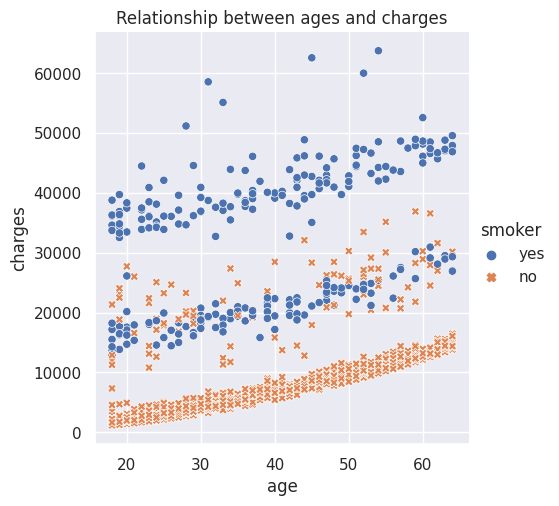

In [41]:
sns.set_theme(style='darkgrid')
plot=sns.relplot(medical_df,x='age',y='charges',hue='smoker',style='smoker')
plt.title('Relationship between ages and charges')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


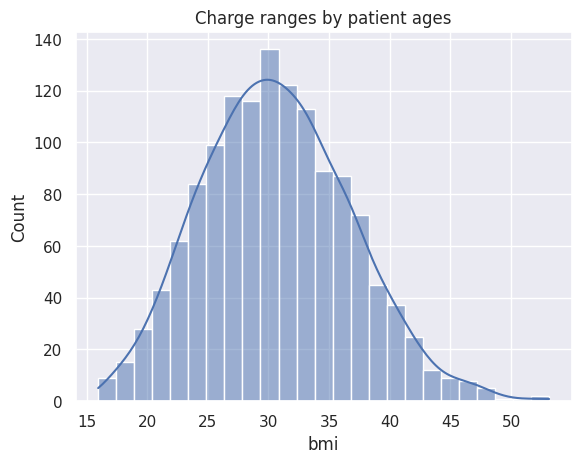

In [42]:
sns.histplot(medical_df,x='bmi',kde=True)
plt.title('Charge ranges by patient ages')
plt.show()

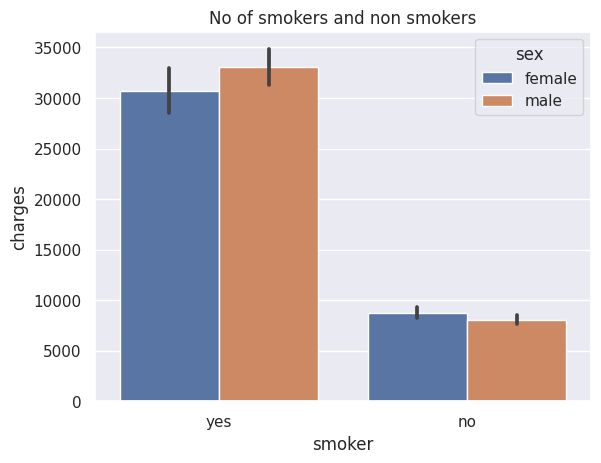

In [43]:
sns.barplot(medical_df,x='smoker',y='charges',hue='sex')
plt.title('No of smokers and non smokers')
plt.show()

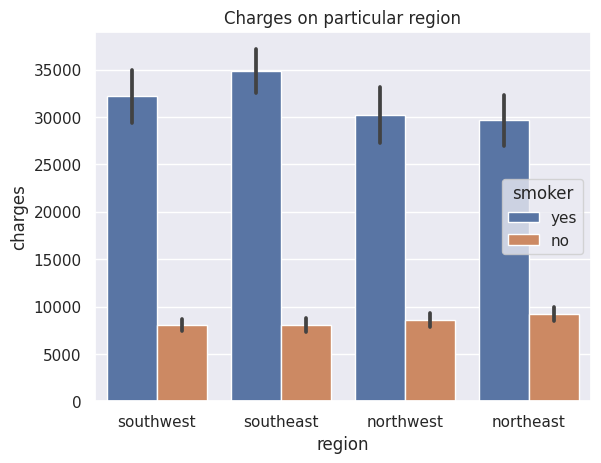

In [44]:
sns.barplot(medical_df,x='region',y='charges',hue='smoker')
plt.title('Charges on particular region')
plt.show()

In [45]:
df=medical_df.drop(['sex','region','smoker'],axis=1)
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


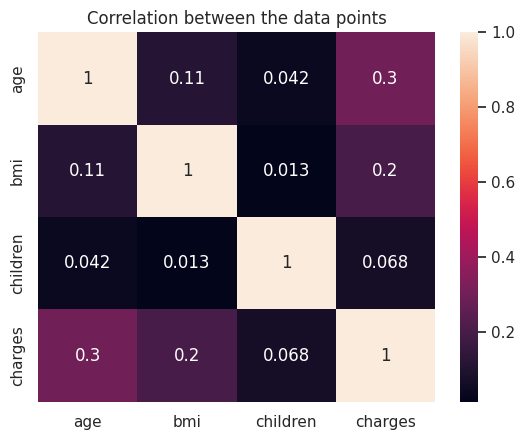

In [46]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the data points')
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [48]:
medical_df['sex']=encoder.fit_transform(medical_df.sex)

In [49]:
medical_df['smoker']=encoder.fit_transform(medical_df.smoker)

In [50]:
medical_df['region']=encoder.fit_transform(medical_df.region)

In [51]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [77]:
medical_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


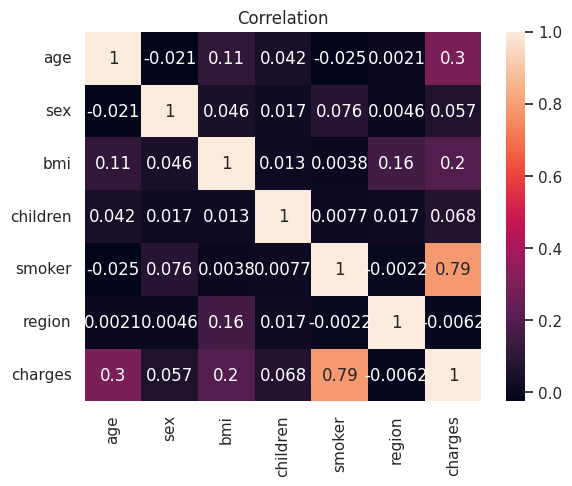

In [52]:
sns.heatmap(medical_df.corr(),annot=True)
plt.title('Correlation')
plt.show()

In [53]:
X=medical_df[['age','bmi','smoker']]
y=medical_df.charges

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Score of MSE {mse}')
print(f'Score of RMSE {rmse}')

Score of MSE 34512843.8802279
Score of RMSE 5874.763304187489


In [66]:
new=[[18,33.770,0]]
model.predict(new)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3985.80568844])

In [71]:
X=medical_df[['age','smoker']]
y=medical_df.charges

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import Lasso
model1=Lasso().fit(X_train,y_train)
y_pred=model1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Score of MSE {mse}')
print(f'Score of RMSE {rmse}')

Score of MSE 38276348.13018017
Score of RMSE 6186.788191798728


In [73]:
new=[[18,0]]
model1.predict(new)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([2582.36943704])

In [74]:
X=medical_df[['smoker']]
y=medical_df.charges

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import Ridge
model1=Ridge().fit(X_train,y_train)
y_pred=model1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Score of MSE {mse}')
print(f'Score of RMSE {rmse}')

Score of MSE 52840487.24208308
Score of RMSE 7269.1462526271325


In [76]:
model1.predict([[0]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([8605.44814428])

In [ ]:
X=medical_df[['age']]
y=medical_df.charges

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import Lasso
model1=Lasso().fit(X_train,y_train)
y_pred=model1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Score of MSE {mse}')
print(f'Score of RMSE {rmse}')

In [78]:
model1.predict([[17]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([400570.31432653])

In [79]:
from sklearn.linear_model import SGDRegressor
model1=SGDRegressor().fit(X_train,y_train)
y_pred=model1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mse,rmse

(52786013.1390727, 7265.398346895558)